<a href="https://colab.research.google.com/github/vaishnavi4445/Iris_EDA_task/blob/main/Iris_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Summary statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



Missing values:


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


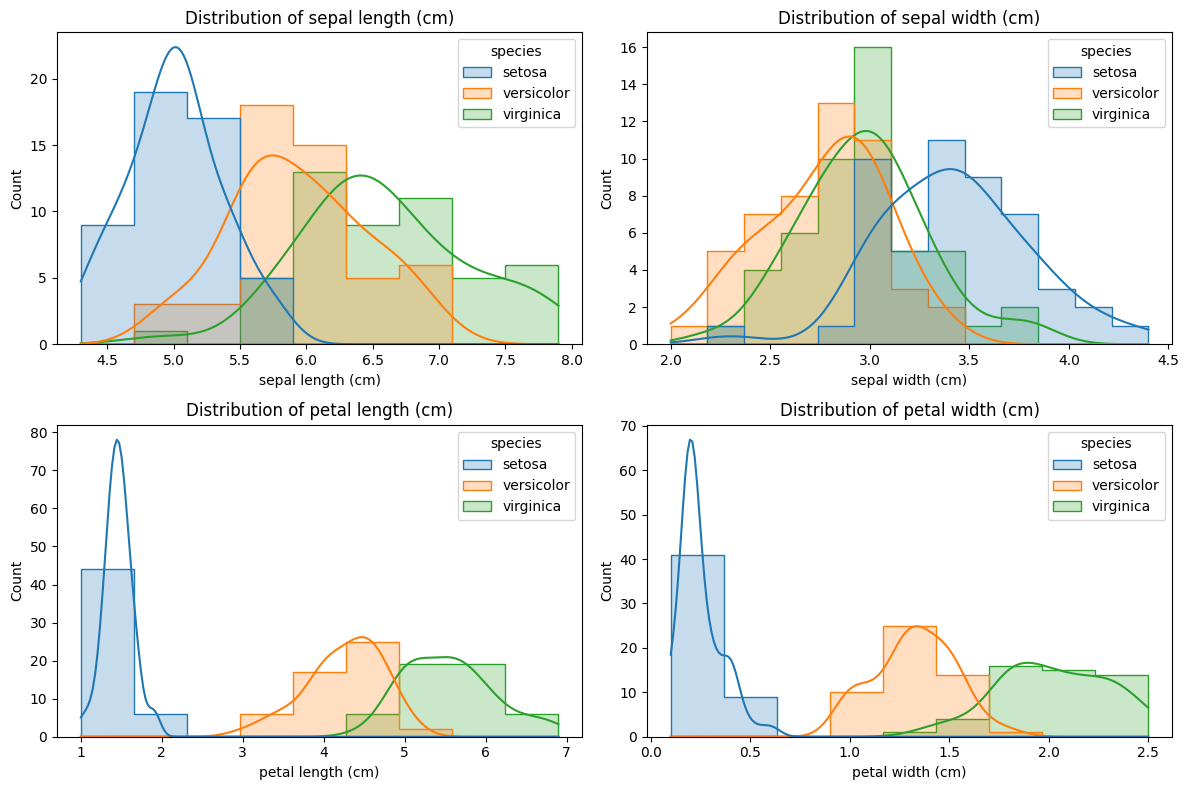

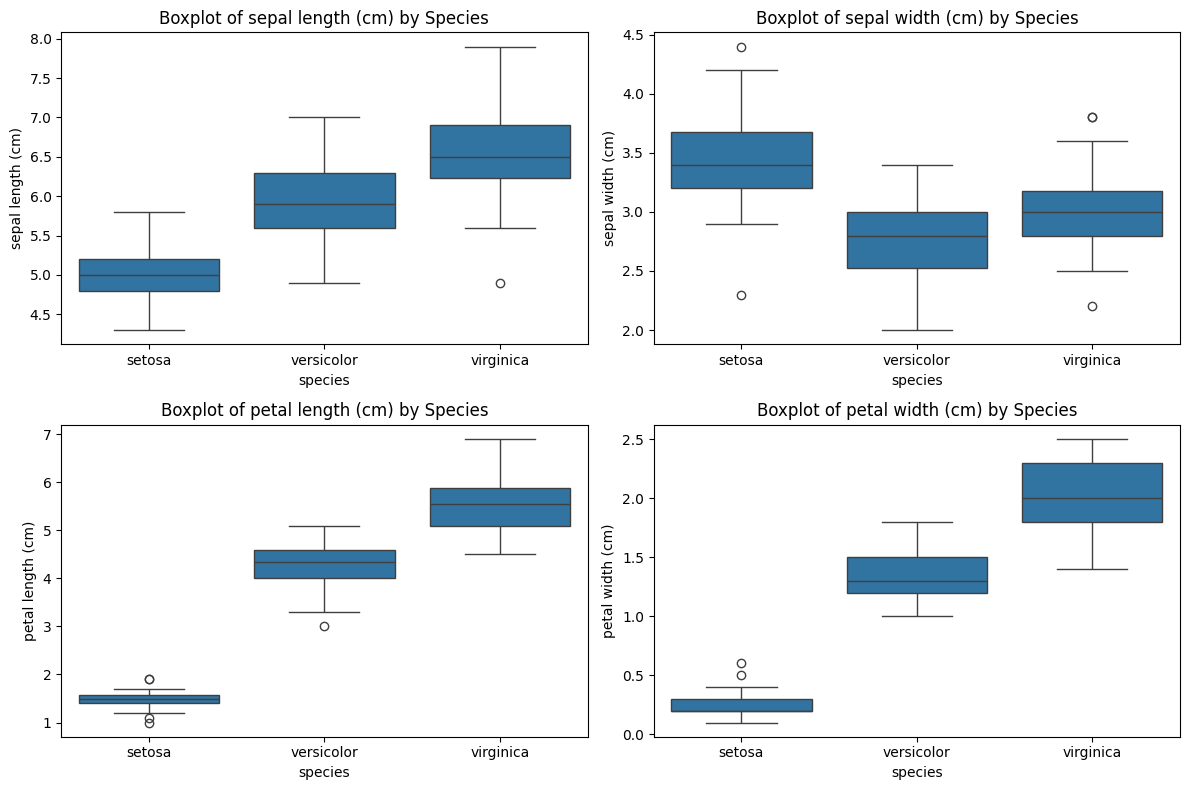

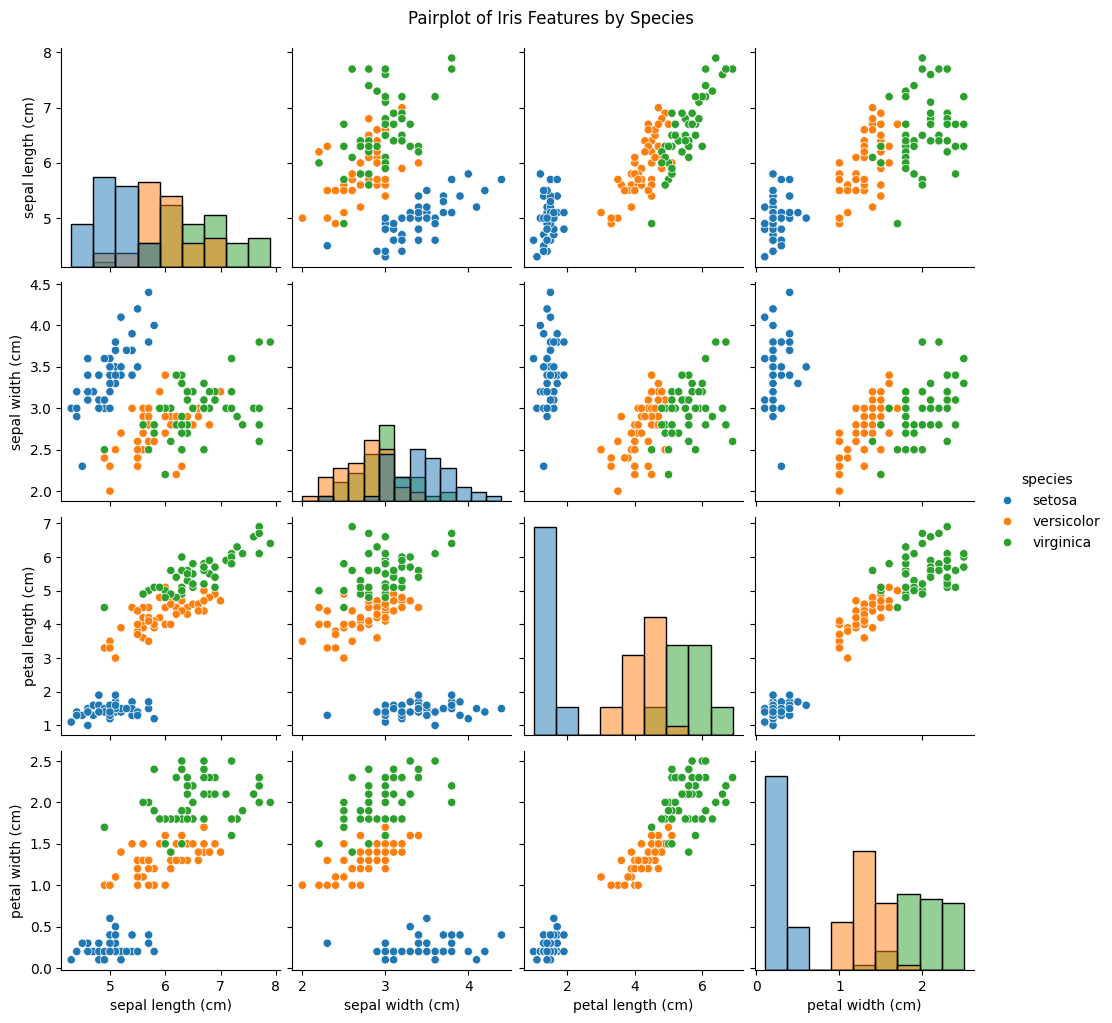

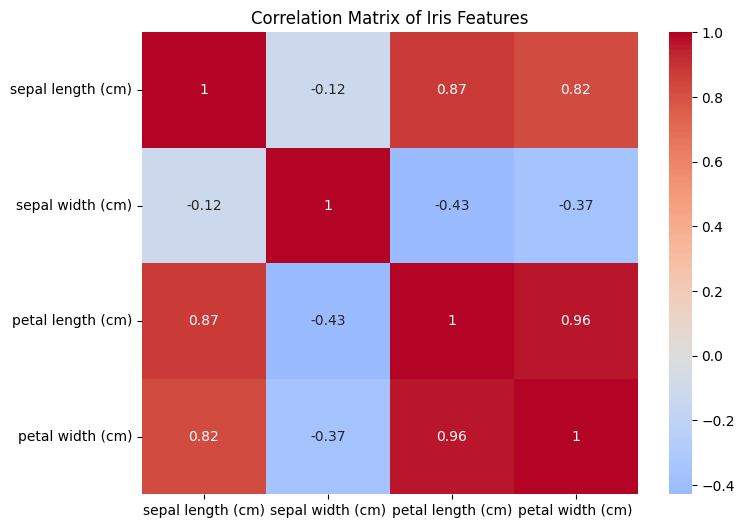

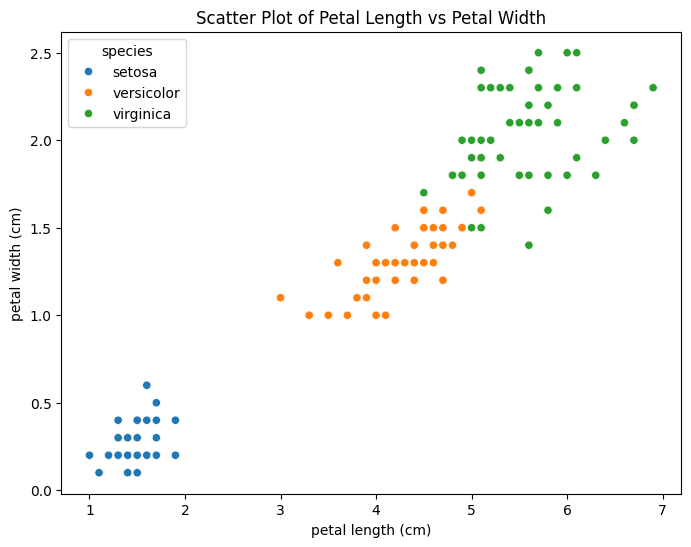


Key Observations:
1. Setosa species has distinctly smaller petal dimensions compared to others.
2. Petal length and width show strong positive correlation (0.96).
3. Virginica has the largest sepal length on average but similar sepal width to versicolor.
4. No missing values found in the dataset.
5. All features show good separation between species except sepal width which has some overlap.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import os

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display first 5 rows
print("First 5 rows of the dataset:")
display(iris_df.head())

# Basic information about the dataset
print("\nDataset information:")
iris_df.info()

# Generate summary statistics
print("\nSummary statistics:")
display(iris_df.describe())

# Check for missing values
print("\nMissing values:")
display(iris_df.isnull().sum())

# Create the 'images' directory if it doesn't exist
if not os.path.exists('images'):
    os.makedirs('images')

# 1. Histograms for numeric features
plt.figure(figsize=(12, 8))
for i, col in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=iris_df, x=col, kde=True, hue='species', element='step')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('images/histogram.png')
plt.show()

# 2. Boxplots for numeric features
plt.figure(figsize=(12, 8))
for i, col in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=iris_df, x='species', y=col)
    plt.title(f'Boxplot of {col} by Species')
plt.tight_layout()
plt.savefig('images/boxplot.png')
plt.show()

# 3. Pairplot for feature relationships
pairplot = sns.pairplot(iris_df, hue='species', diag_kind='hist')
pairplot.fig.suptitle('Pairplot of Iris Features by Species', y=1.02)
pairplot.savefig('images/pairplot.png')
plt.show()

# 4. Correlation matrix
plt.figure(figsize=(8, 6))
corr_matrix = iris_df.iloc[:, :4].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Iris Features')
plt.savefig('images/correlation_matrix.png')
plt.show()

# 5. Scatter plot of most correlated features
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='species')
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.savefig('images/scatterplot.png')
plt.show()

# Feature-level inferences
print("\nKey Observations:")
print("1. Setosa species has distinctly smaller petal dimensions compared to others.")
print("2. Petal length and width show strong positive correlation (0.96).")
print("3. Virginica has the largest sepal length on average but similar sepal width to versicolor.")
print("4. No missing values found in the dataset.")
print("5. All features show good separation between species except sepal width which has some overlap.")